# Εργασία 1 - Περιόδου 2022-2023





## Πάνος Κόλλιας 1115202000086
## Κωνσταντίνος Κανελλάκης 1115202000064

---

## Preprocessing/Cleaning


### Q1

In [120]:
import sklearn as sk
import pandas as pd
import math
import matplotlib.pyplot as mpl
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans
# !!!!!!Change the path to the file which contains the data (named marketing_campaign.csv)!!!!!!
Location = 'marketing_campaign.csv'
df = pd.read_csv(Location,sep='\t')

df=df.dropna() # Remove rows with at least one nan element

df.Dt_Customer=pd.to_datetime(df.Dt_Customer,dayfirst=True,format='%d-%m-%Y') # Convert dates to Date Time objects

### Q2.Unique Values

<Axes: title={'center': 'Amount of people for each category'}>

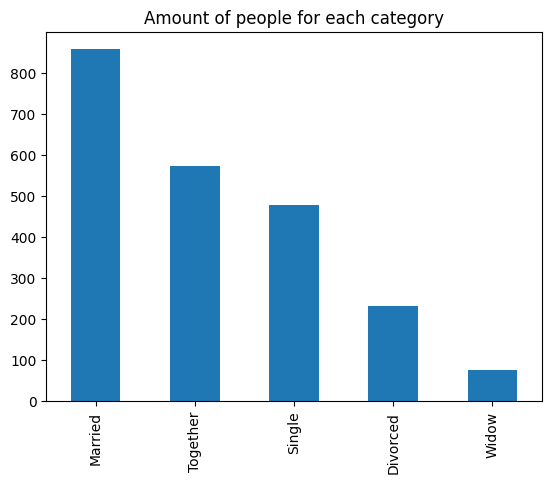

In [121]:
for x in ('Alone','Absurd','YOLO'):
  df = df.replace(x,'Single')
marital=df['Marital_Status'].value_counts()
marital.plot.bar(title='Amount of people for each category')

<Axes: title={'center': 'Amount of people for each category'}>

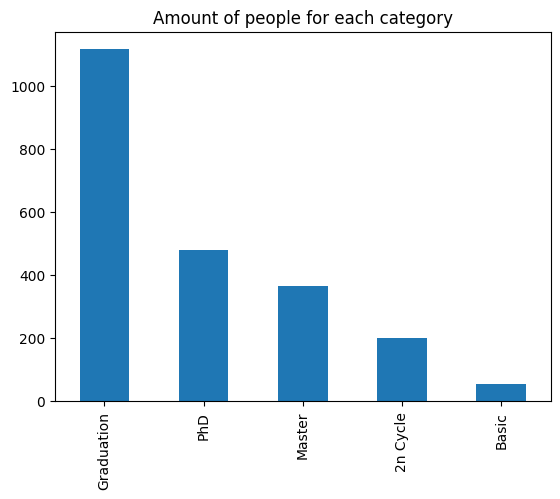

In [122]:
vals=df['Education'].value_counts()
vals.plot.bar(title='Amount of people for each category')

## Q3.New Data


In [123]:
from datetime import date, datetime, timedelta
# Get today's date
today = date.today()
# Transform the type to perform calculations
today = today.strftime("%Y-%m-%d")
today = datetime.strptime(today, "%Y-%m-%d")

diff = []
for x,y in zip(df['Recency'],df['Dt_Customer']):
  days = (today - timedelta(days=x))-y
  diff.append(days.days)
df['Customer_For'] = diff
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,3834
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,3304
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,3515
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,3342
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,3296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,3564
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,3192
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,3293
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,3377


In [124]:
age = []
for x in df['Year_Birth']:
  age.append(today.year-x)
df['Age'] = age
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,3834,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,3304,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,3515,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,3342,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,3296,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,3564,56
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,3192,77
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,3293,42
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,3377,67


In [125]:
total = []
for x,y,z,u,v,n in zip(df['MntWines'],df['MntFruits'],df['MntMeatProducts'],df['MntFishProducts'],df['MntSweetProducts'],df['MntGoldProds']):
  total.append(x+y+z+u+v+n)
df['Spent'] = total
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,3834,66,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,3304,69,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,3515,58,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,3342,39,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,3296,42,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,3564,56,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,3192,77,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,3293,42,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,3377,67,843


In [126]:
kids = []
for x,y in zip(df['Kidhome'],df['Teenhome']):
  kids.append(x+y)
df['Kids'] = kids
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Kids
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,3834,66,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,3304,69,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,3515,58,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,3342,39,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,3296,42,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,3564,56,1341,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,3192,77,444,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,3293,42,1241,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,3377,67,843,1


In [127]:
family = []
for x,y in zip(df['Kids'],df['Marital_Status']):
  if y == 0 or y == 3 or y == 4:
    family.append(x+1)
  else:
    family.append(x+2)
df['Family_Size'] = family
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Kids,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,3834,66,1617,0,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,3304,69,27,2,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,3515,58,776,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,3342,39,53,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,3296,42,422,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,3564,56,1341,1,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,3192,77,444,3,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,3293,42,1241,0,2
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,3377,67,843,1,3


In [128]:
parent = []
for x in df['Kids']:
  if x:
    parent.append(1)
  else:
    parent.append(0)
df['Is_Parent'] = parent
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Kids,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,3834,66,1617,0,2,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,3304,69,27,2,4,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,3515,58,776,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,3342,39,53,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,3296,42,422,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,3564,56,1341,1,3,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,3,11,0,3192,77,444,3,5,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,3293,42,1241,0,2,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,3377,67,843,1,3,1


In [129]:
living = []
for y in df['Marital_Status']:
  if y == 'Single' or y == 'Divorced' or y == 'Widow':
    living.append('Alone')
  else:
    living.append('Partner')
df['Living_With'] = living
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Kids,Family_Size,Is_Parent,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,3834,66,1617,0,2,0,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,3304,69,27,2,4,1,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,3515,58,776,0,2,0,Partner
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,3342,39,53,1,3,1,Partner
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,3296,42,422,1,3,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,11,0,3564,56,1341,1,3,1,Partner
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,3,11,0,3192,77,444,3,5,1,Partner
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,11,0,3293,42,1241,0,2,0,Alone
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,11,0,3377,67,843,1,3,1,Partner


In [130]:
age_groups = []
for x in df['Age']:
  if x > 20 and x < 31:
    age_groups.append('21-30')
  elif x > 30 and x < 41:
    age_groups.append('31-40')
  elif x > 40 and x < 51:
    age_groups.append('41-50')
  elif x > 50 and x < 61:
    age_groups.append('51-60')
  elif x > 60 and x < 71:
    age_groups.append('61-70')
  elif x > 70 and x < 81:
    age_groups.append('71-80')
  elif x > 80:
    age_groups.append('>81')
df['Age_Group'] = age_groups
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Kids,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,3834,66,1617,0,2,0,Alone,61-70
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,3304,69,27,2,4,1,Alone,61-70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,3515,58,776,0,2,0,Partner,51-60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,3342,39,53,1,3,1,Partner,31-40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,3296,42,422,1,3,1,Partner,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,11,0,3564,56,1341,1,3,1,Partner,51-60
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,11,0,3192,77,444,3,5,1,Partner,71-80
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,11,0,3293,42,1241,0,2,0,Alone,41-50
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,11,0,3377,67,843,1,3,1,Partner,61-70


## Q4.Outliers

In [131]:
cols=['Year_Birth','Income', 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
for x in cols:
  mean = df[x].mean()
  std = df[x].std()
  for i,y in zip(df.index,df[x]):
   sub = abs(mean-y)
   z = sub / std
   if z >= 3 :
     df = df.drop(i)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Kids,Family_Size,Is_Parent,Living_With,Age_Group
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,3304,69,27,2,4,1,Alone,61-70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,3515,58,776,0,2,0,Partner,51-60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,3342,39,53,1,3,1,Partner,31-40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,3296,42,422,1,3,1,Partner,41-50
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,11,0,3506,56,716,1,3,1,Partner,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,11,0,3511,49,30,1,3,1,Partner,41-50
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,11,0,3192,77,444,3,5,1,Partner,71-80
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,11,0,3293,42,1241,0,2,0,Alone,41-50
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,11,0,3377,67,843,1,3,1,Partner,61-70


## Q5.Heatmap

<Axes: >

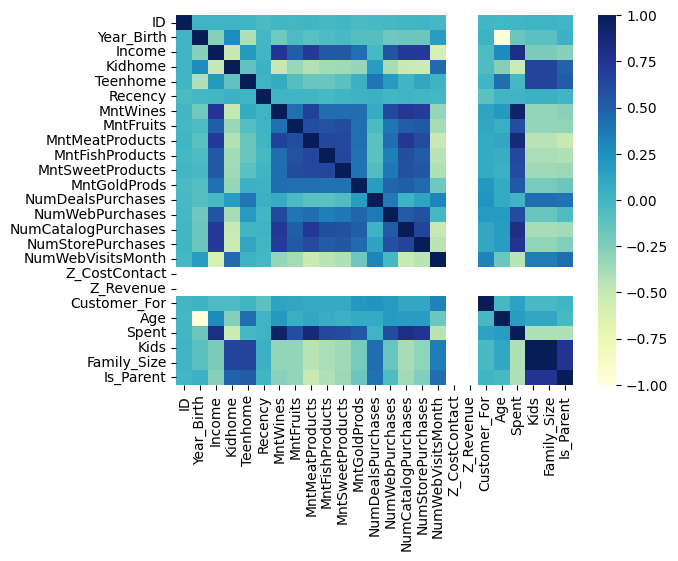

In [132]:
import seaborn as sns
newdf = df.copy()
iris=newdf
fordelete=['Education', 'Marital_Status','Living_With','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response','Age_Group','Dt_Customer']
for x in fordelete:
  del newdf[x]

correlation=newdf.corr()
sns.heatmap(correlation,cmap="YlGnBu",annot=False)

## Q6.Graphs

### Q6.1-5

<Axes: ylabel='Marital_Status'>

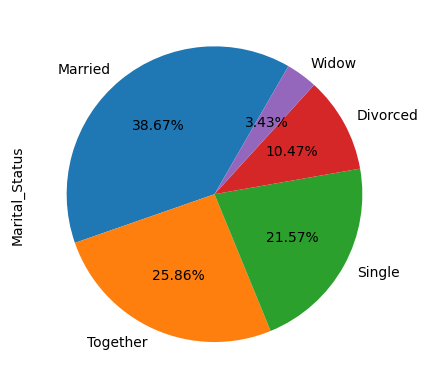

In [133]:
marital.plot.pie(autopct='%1.2f%%',startangle=60)

<Axes: ylabel='Complain'>

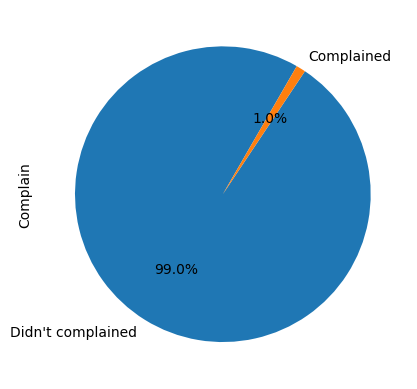

In [134]:
ls = []
vals1 = df['Complain'].value_counts()

for x in vals1.index:
  if x == 0:
    ls.append('Didn\'t complained')
  else:
    ls.append('Complained')
vals1.index=ls
vals1.plot.pie(autopct='%1.1f%%', startangle=60)

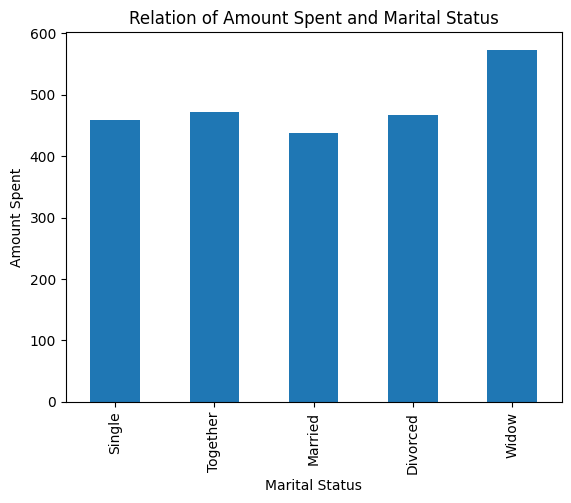

In [135]:
ls = []
index = []
for x in df['Marital_Status'].unique():
  ls.append(df['Spent'][df['Marital_Status'] == x].mean())
  index.append(x)

incomes=pd.Series(ls)
incomes.index = index
incomes.plot.bar(title='Relation of Amount Spent and Marital Status')
mpl.ylabel('Amount Spent')
mpl.xlabel('Marital Status')
mpl.show()

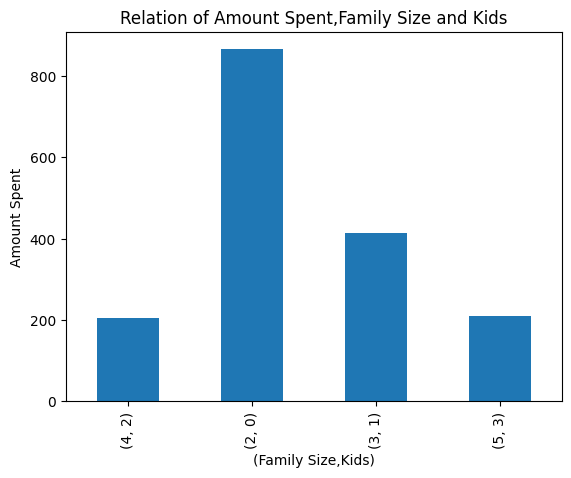

In [136]:
import itertools
import numpy as np
unique1 = df['Kids'].unique()
unique2 = df['Family_Size'].unique()

combs = list(itertools.product(unique1, unique2))

ls = []
index = []
for x,y in combs:
  f = df['Spent'][(df['Family_Size'] == y) & (df['Kids'] == x)].mean()
  if f is not np.NaN:
    ls.append(f)
    index.append((y,x))

incomes=pd.Series(ls)
incomes.index = index
incomes.plot.bar(title='Relation of Amount Spent,Family Size and Kids')
mpl.ylabel('Amount Spent')
mpl.xlabel('(Family Size,Kids)')
mpl.show()

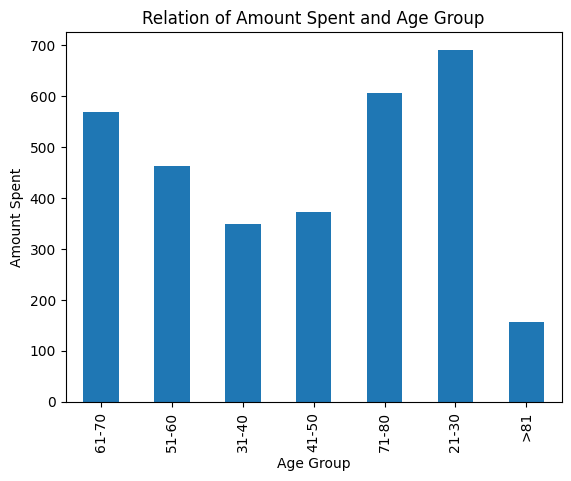

In [137]:
ls = []
index = []
for x in df['Age_Group'].unique():
  ls.append(df['Spent'][df['Age_Group'] == x].mean())
  index.append(x)

incomes=pd.Series(ls)
incomes.index = index
incomes.plot.bar(title='Relation of Amount Spent and Age Group')
mpl.ylabel('Amount Spent')
mpl.xlabel('Age Group')
mpl.show()

### Q6.7-10

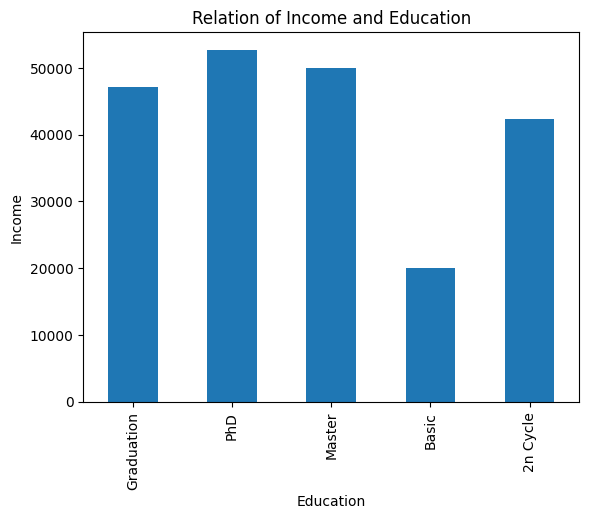

In [138]:
ls = []
index = []
for x in df['Education'].unique():
  ls.append(df['Income'][df['Education'] == x].mean())
  index.append(x)

incomes=pd.Series(ls)
incomes.index = index
incomes.plot.bar(title='Relation of Income and Education')
mpl.ylabel('Income')
mpl.xlabel('Education')
mpl.show()

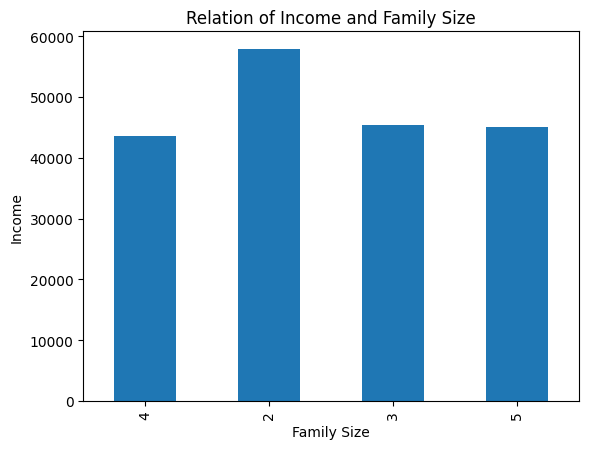

In [139]:
ls = []
index = []
for x in df['Family_Size'].unique():
  ls.append(df['Income'][df['Family_Size'] == x].mean())
  index.append(x)

incomes=pd.Series(ls)
incomes.index = index
incomes.plot.bar(title='Relation of Income and Family Size')
mpl.ylabel('Income')
mpl.xlabel('Family Size')
mpl.show()

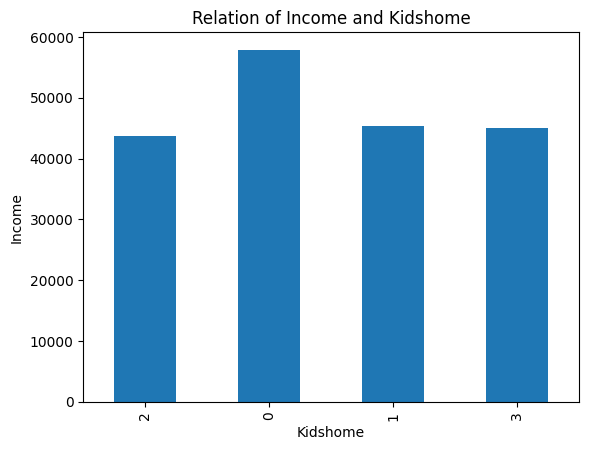

In [140]:
ls = []
index = []
for x in df['Kids'].unique():
  ls.append(df['Income'][df['Kids'] == x].mean())
  index.append(x)

incomes=pd.Series(ls)
incomes.index = index
incomes.plot.bar(title='Relation of Income and Kidshome')
mpl.ylabel('Income')
mpl.xlabel('Kidshome')
mpl.show()

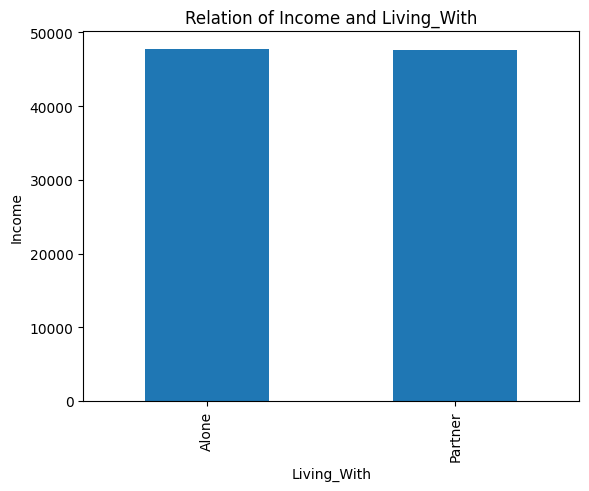

In [141]:
ls = []
index = []
for x in df['Living_With'].unique():
  ls.append(df['Income'][df['Living_With'] == x].mean())
  index.append(x)

incomes=pd.Series(ls)
incomes.index = index
incomes.plot.bar(title='Relation of Income and Living_With')
mpl.ylabel('Income')
mpl.xlabel('Living_With')
mpl.show()

### Q6.14-17

Text(0, 0.5, 'Frequency')

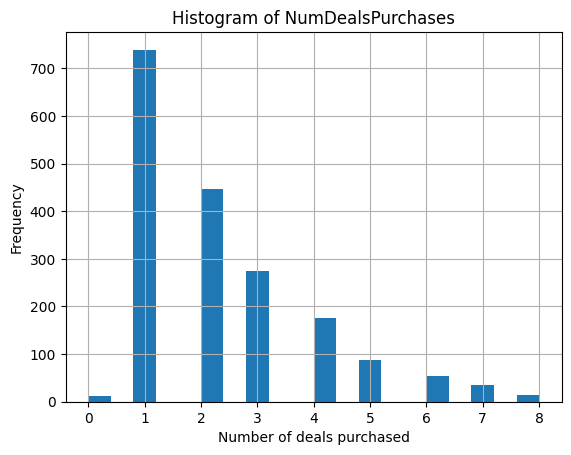

In [142]:
hist_plot=df['NumDealsPurchases'].hist(bins=20)
hist_plot.set_title('Histogram of NumDealsPurchases')
hist_plot.set_xlabel('Number of deals purchased')
hist_plot.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

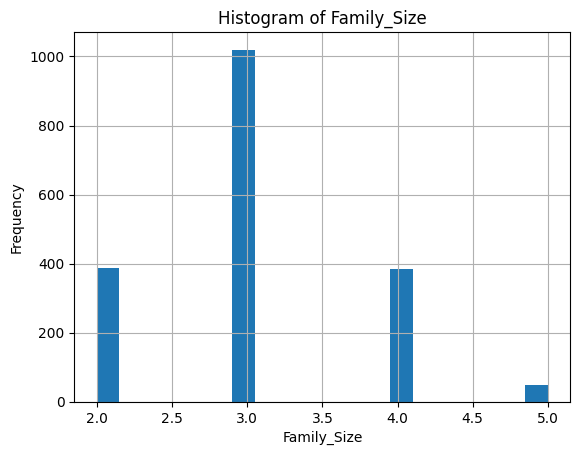

In [143]:
hist_plot=df['Family_Size'].hist(bins=20)
hist_plot.set_title('Histogram of Family_Size')
hist_plot.set_xlabel('Family_Size')
hist_plot.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

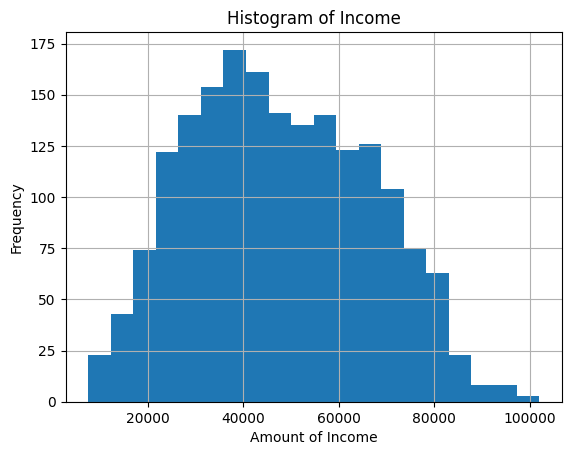

In [144]:
hist_plot=df['Income'].hist(bins=20)
hist_plot.set_title('Histogram of Income')
hist_plot.set_xlabel('Amount of Income')
hist_plot.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

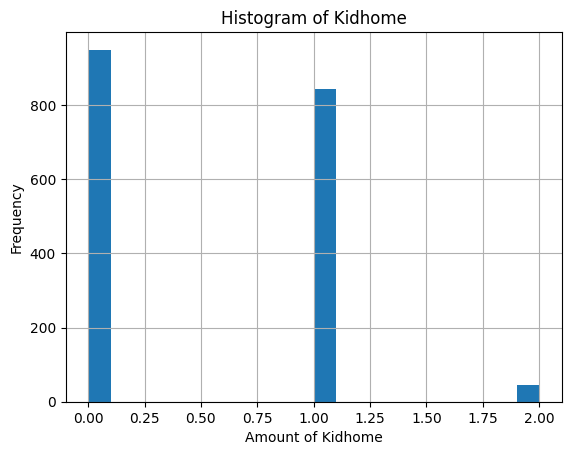

In [145]:
hist_plot=df['Kidhome'].hist(bins=20)
hist_plot.set_title('Histogram of Kidhome')
hist_plot.set_xlabel('Amount of Kidhome')
hist_plot.set_ylabel('Frequency')

## Q7.Encoding-Standardization-PCA

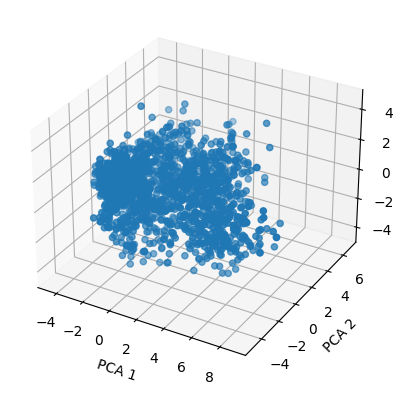

In [149]:
# Making a copy of our data
Z = df.copy()

# Chose only labelencoder for our data
labelencoder = LabelEncoder()
Z['Education'] = labelencoder.fit_transform(Z['Education'])
Z['Marital_Status'] = labelencoder.fit_transform(Z['Marital_Status'])
Z['Living_With'] = labelencoder.fit_transform(Z['Living_With'])

# Which columns will be deleted
fordelete=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response','Age_Group','Dt_Customer']
for x in fordelete:
  del Z[x]

# Standardization 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Z)

# Principal Component Analysis
pca=PCA(n_components=3)
pca.fit(scaled_features)
pca.transform(scaled_features)
X_pca = pca.transform(scaled_features)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the transformed data using a scatter plot
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])

# Set the labels for the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


## Q8.Clustering

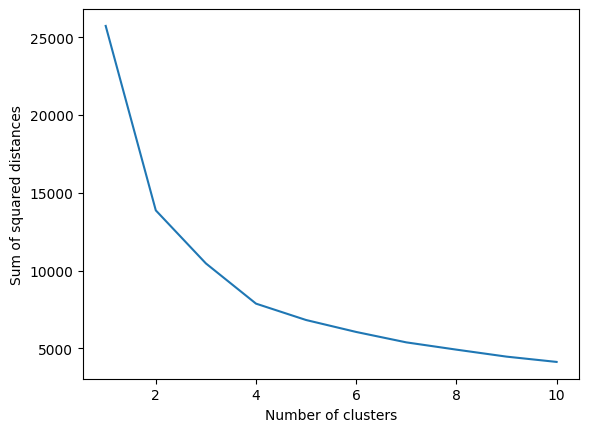

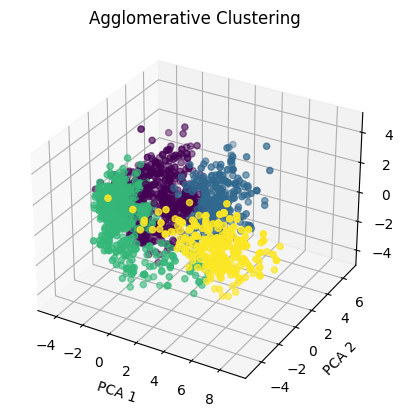

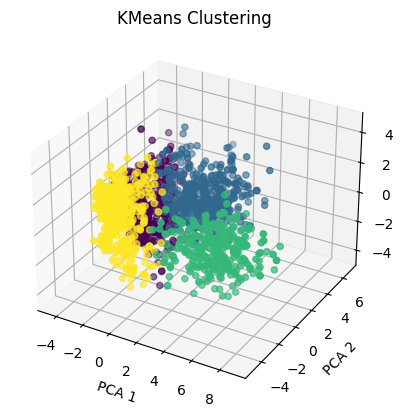

In [147]:
# Elbow Metdod 
distortions = []
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k,n_init=10)
  kmeans.fit_predict(X_pca)
  sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

# Perform Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg.fit_predict(X_pca)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agg_clusters)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('Agglomerative Clustering')
plt.show()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4,n_init=10)
kmeans_clusters = kmeans.fit_predict(X_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_clusters)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('KMeans Clustering')
plt.show()